In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
datos = pd.read_csv('metro - Hoja 1.csv')

In [4]:
coordenadas = datos['Coordenadas'].str.split(',', expand=True)

In [5]:
df_new = pd.concat([datos, coordenadas] , axis=1)

In [6]:
df_new[0] = df_new[0].astype(float)
df_new[1] = df_new[1].astype(float)

In [7]:
def obtener_linea(linea):
    plt.axis('off')
    x = df_new[df_new['Linea'] == linea][1]
    y = df_new[df_new['Linea'] == linea][0]
    color = df_new[df_new['Linea'] == linea]['Color'].iloc[0]
    return plt.plot(x, y, color=color)


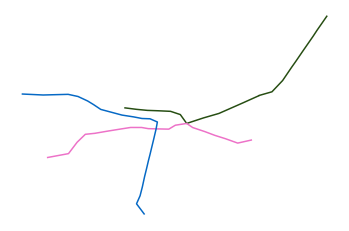

In [9]:
obtener_linea('B')
obtener_linea('1')
obtener_linea('2');

## Sacar Distancias

In [15]:
df_new[['Estacion', 'Linea',0, 1]]

,Estacion,Linea,0,1
0,BUENAVISTA,B,19.446166,-99.152347
1,GUERRERO,B,19.444746,-99.145190
2,GARIBALDI,B,19.443751,-99.138552
3,LAGUNILLA,B,19.443373,-99.131806
4,TEPITO,B,19.442820,-99.124111
...,...,...,...,...
60,Nativitas,2,19.379495,-99.140240
61,Portales,2,19.369818,-99.141585
62,Ermita,2,19.361133,-99.143012
63,General Anaya,2,19.353408,-99.145211


In [19]:
data_distancias = df_new[['Estacion', 'Linea',0, 1]]
data_distancias

,Estacion,Linea,0,1
0,BUENAVISTA,B,19.446166,-99.152347
1,GUERRERO,B,19.444746,-99.145190
2,GARIBALDI,B,19.443751,-99.138552
3,LAGUNILLA,B,19.443373,-99.131806
4,TEPITO,B,19.442820,-99.124111
...,...,...,...,...
60,Nativitas,2,19.379495,-99.140240
61,Portales,2,19.369818,-99.141585
62,Ermita,2,19.361133,-99.143012
63,General Anaya,2,19.353408,-99.145211


In [13]:
from scipy.spatial import distance

In [24]:
estaciones_linea_1 = data_distancias[data_distancias['Linea']== '1']['Estacion'].values

In [25]:
estaciones_linea_1

array(['OBSERVATORIO', 'TACUBAYA', 'JUANACATLAN', 'CHAPULTEPEC',
       'SEVILLA', 'INSURGENTES', 'CUAUHTEMOC', 'BALDERAS',
       'SALTO DEL AGUA', 'ISABEL LA CATOLICA', 'PINO SUAREZ', 'MERCED',
       'CANDELARIA ', 'SAN LAZARO', 'MOCTEZUMA ', 'BALBUENA',
       'BOULEVARD. PTO AEREO ', 'GOMEZ FARIAS ', 'ZARAGOZA', 'PANTITLAN '],
      dtype=object)

19.398191123487997

In [44]:
estaciones_distancias_linea_1 = []
origen_destino = {}

for i in range(len(estaciones_linea_1)-1):
    origen_destino['Origen'] = estaciones_linea_1[i]
    origen_destino['Destino'] = estaciones_linea_1[i+1]
    x1, y1 = data_distancias[data_distancias['Estacion']==estaciones_linea_1[i]][1].values[0],data_distancias[data_distancias['Estacion']==estaciones_linea_1[i]][0].values[0]
    x2, y2 = data_distancias[data_distancias['Estacion']==estaciones_linea_1[i+1]][1].values[0],data_distancias[data_distancias['Estacion']==estaciones_linea_1[i+1]][0].values[0]

    origen_destino['Distancia'] = distance.euclidean((x1, y1), (x2, y2))

    estaciones_distancias_linea_1.append(origen_destino)
    origen_destino = {}

distancias = pd.DataFrame(estaciones_distancias_linea_1)
distancias


,Origen,Destino,Distancia
0,OBSERVATORIO,TACUBAYA,0.013433
1,TACUBAYA,JUANACATLAN,0.012236
2,JUANACATLAN,CHAPULTEPEC,0.009212
3,CHAPULTEPEC,SEVILLA,0.005946
4,SEVILLA,INSURGENTES,0.008023
5,INSURGENTES,CUAUHTEMOC,0.008860
6,CUAUHTEMOC,BALDERAS,0.006008
7,BALDERAS,SALTO DEL AGUA,0.006802
8,SALTO DEL AGUA,ISABEL LA CATOLICA,0.004285
9,ISABEL LA CATOLICA,PINO SUAREZ,0.004914


In [46]:
import networkx as nx

,Origen,Destino,Longitud
0,pantitlán,zaragoza,"1,32"
1,zaragoza,gómez farías,762
2,gómez farías,boulevard puerto aéreo,611
3,boulevard puerto aéreo,balbuena,595
4,balbuena,moctezuma,703
...,...,...,...
178,eje central,parque de los venados,"1,28"
179,parque de los venados,zapata,563
180,zapata,hospital 20 de noviembre,450
181,hospital 20 de noviembre,insurgentes sur,725


['balbuena',
 'moctezuma',
 'san lázaro',
 'candelaria',
 'fray servando',
 'jamaica',
 'chabacano',
 'lázaro cardenas',
 'centro médico',
 'etiopía/plaza de la transparencia',
 'eugenia',
 'división del norte',
 'zapata',
 'coyoacán',
 'viveros/derechos humanos',
 'miguel ángel de quevedo',
 'copilco',
 'universidad']

In [56]:
Origen = 'Balbuena'.lower()
Destino = 'universidad'.lower()

df = pd.read_csv('Distancias - Hoja 1.csv')

METRO = nx.from_pandas_edgelist(df,source='Origen',target='Destino',edge_attr='Longitud')
djk_path = nx.dijkstra_path(METRO, source='balbuena', target='universidad', weight='Longitud')
djk_path

TypeError: unsupported operand type(s) for +: 'int' and 'str'